In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [37]:
data1 = pd.read_csv('freeFormResponses.csv', skiprows=[1])
data2 = pd.read_csv('multipleChoiceResponses.csv', skiprows = [1])
data2.drop('Q34_Part_1', axis = 1)
data3 = pd.read_csv('SurveySchema.csv')

/home/juan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (157,172,174,210,218,219,246,368,371,384,389,390,391,393) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
data2

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
4,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
5,1142,Male,-1,25-29,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,-1,Computers/Technology,...,-1,NaN,NaN,NaN,Afraid that others will use my work without gi...,NaN,I had never considered making my work easier f...,NaN,NaN,-1
6,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,-1,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1
7,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,Other,...,-1,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
8,641,Male,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),Not employed,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
9,751,Male,-1,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,-1,Online Service/Internet-based Services,...,-1,NaN,Too time-consuming,NaN,Afraid that others will use my work without gi...,NaN,NaN,NaN,NaN,-1


Being a prospect of scientist in a latin american country I have experienced the difficulties that are braught to this comunity by the governamental desicions, high costs of education and the lack of interest of the industrialists in technological advances. This made me think it would be interesting to find out if this carries on to every branch. This survey was an opportunitie to explore this in the data and computer science community. With this in mind i proceeded to find out what proportion of the total population surveyed belonged to Latin American countries. 

In [39]:
data2.iloc[:,0:276] = data2.iloc[:,0:276].fillna('Other')
data2.iloc[:,277:290] = data2.iloc[:,277:290].fillna(0)
data2.iloc[:,290:] = data2.iloc[:,290:].fillna('Other')
mkeys = data2.keys()


In [40]:
Country = data2['Q3']
C1 = Country.values
C2 = Country.value_counts()

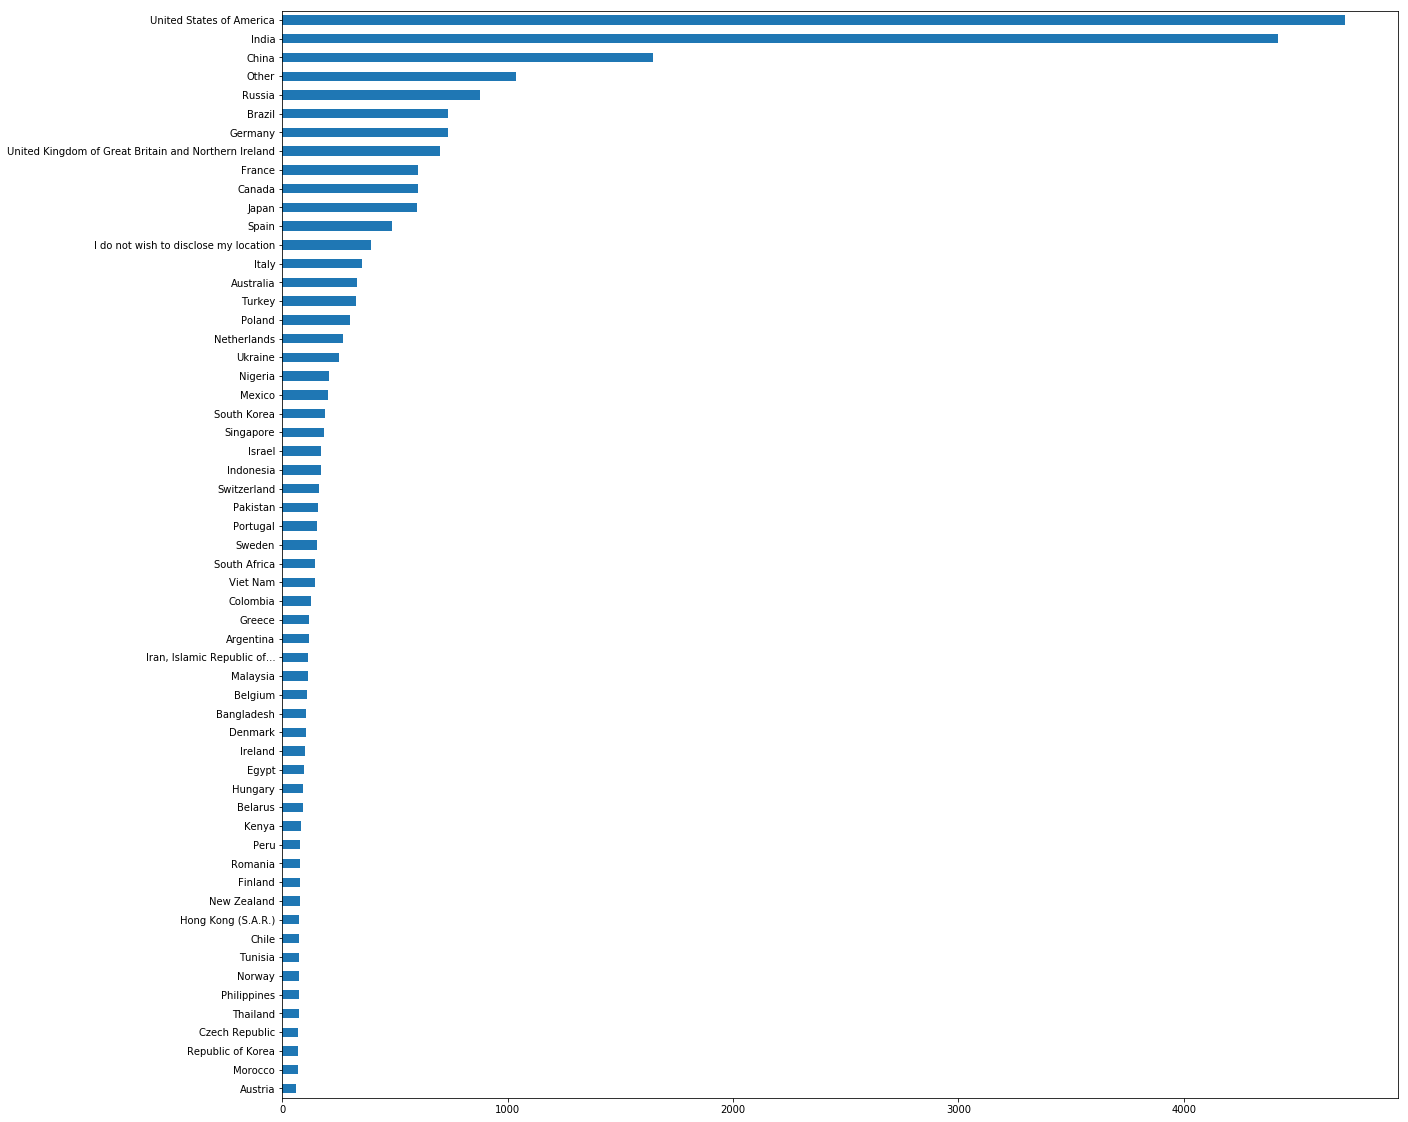

In [41]:
plt.figure(figsize = (20,20))
ax = C2.plot.barh()
ax.invert_yaxis()
plt.show()

With this simple descripitive graph i could see that most of the scientist where ether in north america, india or europe so i decided to see what percentage of the population came from a Latin American country. 

In [42]:
#Finding the total number of respondants

Total = np.sum(C2)
print(Total)

#Finding the total numbre of Latin American respondants. excluding the other and i do not wish to disclose my info responses 

LAC = ['Argentina', 'Brazil', 'Colombia', 'Mexico', 'Chile', 'Peru'] #array of countries from Latin America with more than 50 respondants 
NA = ['United States of America', 'Canada']
TotalL = 0
TotalN = 0
for i in range(len(LAC)):
    TotalL += C2[LAC[i]]
    if (i <= 0):
        TotalN += C2[NA[i]]

print(TotalL, TotalN, C2['Colombia'])

#So we know that the Latin American population represents a small percentage of the Kaggle community.

percentageL = TotalL*100.0 / Total
percentageN = TotalN*100.0 / Total
print('The percentage of Latin Americans represented in this survey is ', percentageL, 'while, just to compare with a small number of countries, North America represents ', percentageN)

23859
1342 4716 128
The percentage of Latin Americans represented in this survey is  5.62471184878 while, just to compare with a small number of countries, North America represents  19.7661259902


I found that the percentage of Latin Americans represented in this survey is  5.62471184878 while, just to compare with a small number of countries, North America represents  19.7661259902 This simple statistical numbers are a true reflection of what you can see as a scientist in any Latin American country. For example, in Colombia, where I live in, little has been donde to encourage the population to opt for, or even persue after finishing an undergraduate program, a carrier in science. This speaks of how Colombia and Latin American countries think of the importance of technological and scientific advances. They are mostly left aside for more profitable carriers in the industrie, mostly administration or economics. Never the less i could see that this interests has been shifting through the years, so i wanted to see the age ranges of the surveyed Latin American population.

In [43]:
Ages = data2['Q2']
A1 = Ages.values
#ocurrance of ages
A2 = Ages.value_counts()
AArg = Ages[C1 == 'Argentina'].value_counts()
ACol = Ages[C1 == 'Colombia'].value_counts()
AChi = Ages[C1 == 'Chile'].value_counts()
AMex = Ages[C1 == 'Mexico'].value_counts()
APer = Ages[C1 == 'Peru'].value_counts()
ABra = Ages[C1 == 'Brazil'].value_counts()

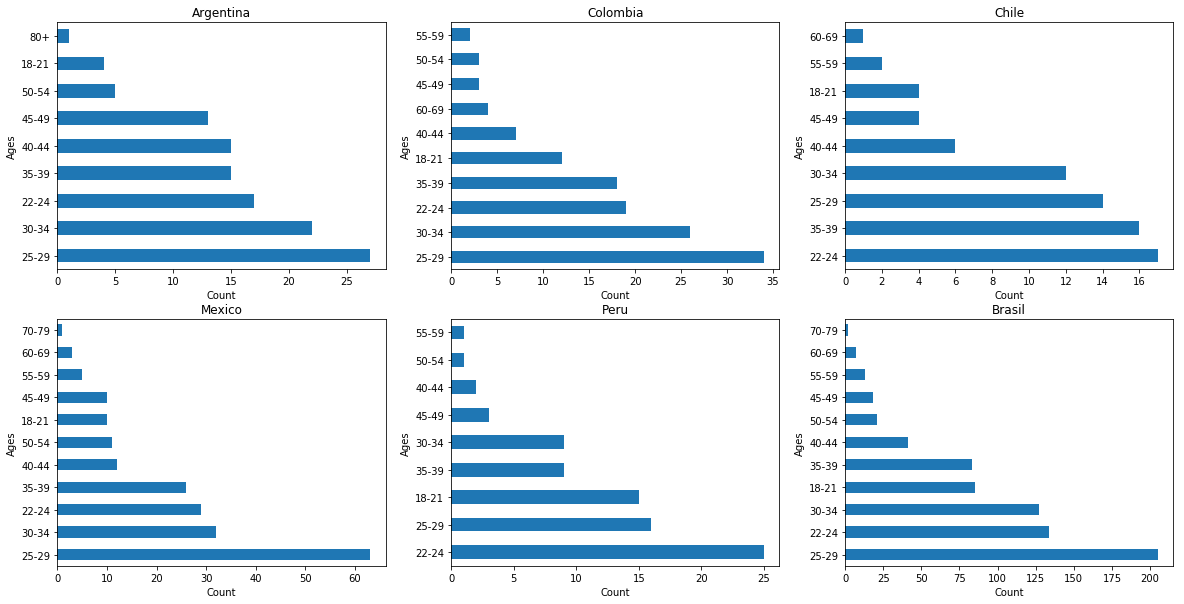

In [44]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.title('Argentina')
plt.xlabel('Count')
plt.ylabel('Ages')
AArg.plot.barh()
plt.subplot(2,3,2)
plt.title('Colombia')
plt.xlabel('Count')
plt.ylabel('Ages')
ACol.plot.barh()
plt.subplot(2,3,3)
plt.title('Chile')
plt.xlabel('Count')
plt.ylabel('Ages')
AChi.plot.barh()
plt.subplot(2,3,4)
plt.title('Mexico')
plt.xlabel('Count')
plt.ylabel('Ages')
AMex.plot.barh()
plt.subplot(2,3,5)
plt.title('Peru')
plt.xlabel('Count')
plt.ylabel('Ages')
APer.plot.barh()
plt.subplot(2,3,6)
plt.title('Brasil')
plt.xlabel('Count')
plt.ylabel('Ages')
ABra.plot.barh()




plt.show()

This  graphs gave me an insight to the population age.  I could se that, just as I thought,  younger generations in this countries are going more into scientific carriers, in this data set related to computer science. This finding made me think that degree of education could be a great factor contributing to this increase, so i decided that this could be another relevant piece of data.

In [45]:
education = data2['Q4']
A1 = Ages.values
#ocurrance of ages
A2 = Ages.value_counts()
EArg = education[C1 == 'Argentina'].value_counts()
ECol = education[C1 == 'Colombia'].value_counts()
EChi = education[C1 == 'Chile'].value_counts()
EMex = education[C1 == 'Mexico'].value_counts()
EPer = education[C1 == 'Peru'].value_counts()
EBra = education[C1 == 'Brazil'].value_counts()

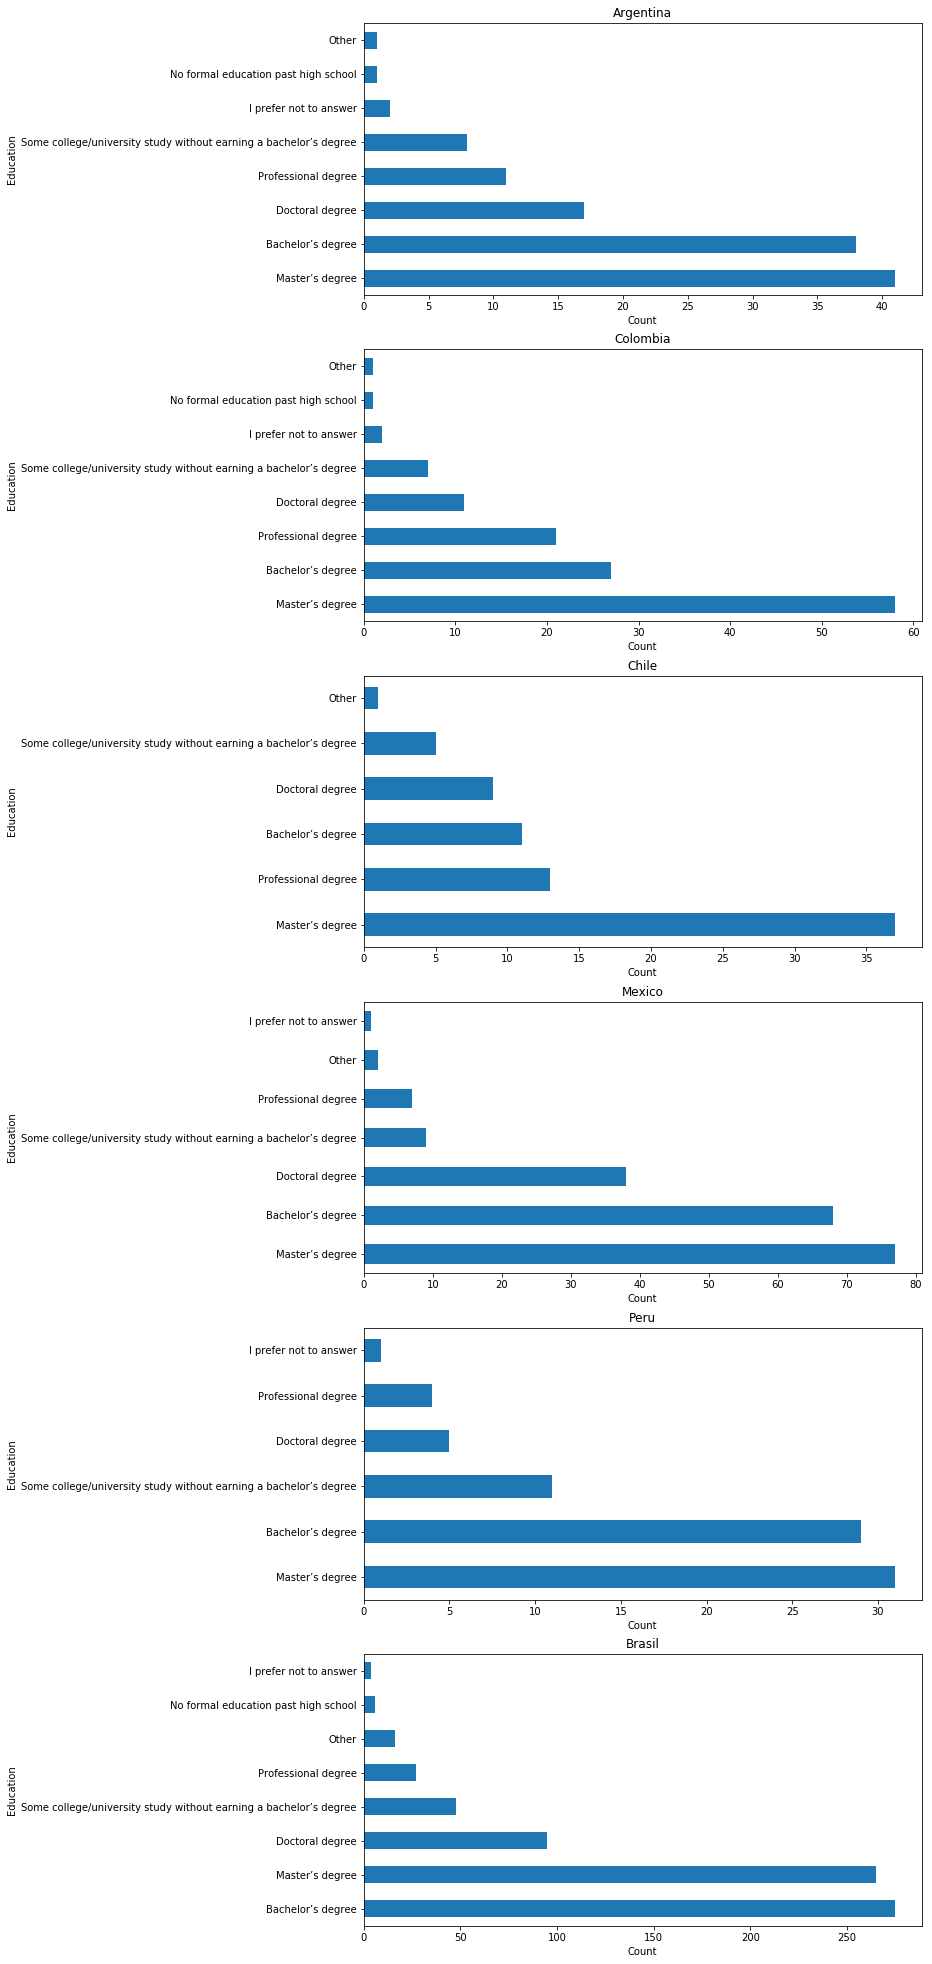

In [46]:
plt.figure(figsize=(10,35))
plt.subplot(6,1,1)
plt.title('Argentina')
plt.xlabel('Count')
plt.ylabel('Education')
EArg.plot.barh()
plt.subplot(6,1,2)
plt.title('Colombia')
plt.xlabel('Count')
plt.ylabel('Education')
ECol.plot.barh()
plt.subplot(6,1,3)
plt.title('Chile')
plt.xlabel('Count')
plt.ylabel('Education')
EChi.plot.barh()
plt.subplot(6,1,4)
plt.title('Mexico')
plt.xlabel('Count')
plt.ylabel('Education')
EMex.plot.barh()
plt.subplot(6,1,5)
plt.title('Peru')
plt.xlabel('Count')
plt.ylabel('Education')
EPer.plot.barh()
plt.subplot(6,1,6)
plt.title('Brasil')
plt.xlabel('Count')
plt.ylabel('Education')
EBra.plot.barh()




plt.show()

In [47]:
obj = data2.select_dtypes(include=['object']).copy()
obj = pd.get_dummies(obj)
encoded = pd.concat([data2.iloc[:,0],obj,data2.select_dtypes(exclude = ['object']).copy()],axis=1)
n_features = len(mkeys)

In [48]:
encoded[mkeys[0]] = encoded[mkeys[0]].fillna(0)
encoded = encoded.fillna(-1)

In [49]:
label_encoder = LabelEncoder()
t=np.zeros(np.shape(data2))
for i in range(len(data2.iloc[0,:])):
    t[:,i] = label_encoder.fit_transform(data2.iloc[:,i])
print(t[:,4])

[ 56.  22.  56. ...,  53.  55.  48.]


In [50]:
x=np.zeros((np.shape(data2)[0],10))
x[:,0] = t[:,1] #genre
x[:,1] = t[:,3] #age
x[:,2] = t[:,4] #country 
x[:,3] = t[:,5] #level of education
x[:,4] = t[:,6] #major
x[:,5] = t[:,7] #role
x[:,6] = t[:,9] #industry
x[:,7] = t[:,11] #experience
x[:,8] = t[:,12] #compensation
x[:,9] = t[:,13] #employer ML
y = x
z = x
print(z[:,2])

[ 56.  22.  56. ...,  53.  55.  48.]


In [51]:
#Kmeans Clusters
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
print(wcss)

[12016580.357852383, 5594084.7060324531, 4827377.9444193495, 4235231.7535146158, 3824801.2826723009, 3561873.0536494856, 3332253.1536799069, 3152966.685697108, 2990134.7732217195, 2837663.8162615588]


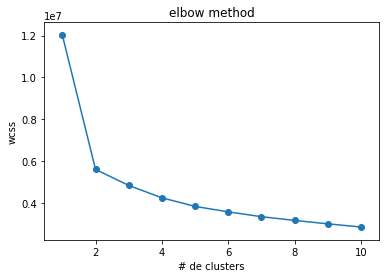

In [52]:
plt.plot(np.linspace(1,10,10), wcss)
plt.scatter(np.linspace(1,10,10), wcss)
plt.xlabel('# de clusters')
plt.ylabel('wcss')
plt.title('elbow method')
plt.show()

In [53]:
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 0 1 ..., 1 1 1]


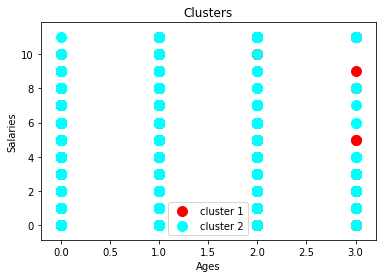

In [54]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'cyan', label = 'cluster 2')
#plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'cluster 3')
plt.legend()
plt.ylabel('Salaries')
plt.xlabel('Ages')
plt.title('Clusters')
plt.show()

In [55]:
pca = PCA(n_components=None)
pca.fit(y)
Variance_Ratio = pca.explained_variance_ratio_

cv = []
count = Variance_Ratio[0]
for i in range(0,10):
    if i > 0:
        count += Variance_Ratio[i]
    cv.append(count)

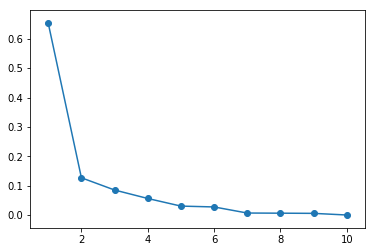

In [56]:
X1 = np.linspace(1,10,10)
plt.plot(X1, Variance_Ratio)
plt.scatter(X1, Variance_Ratio)
plt.show()

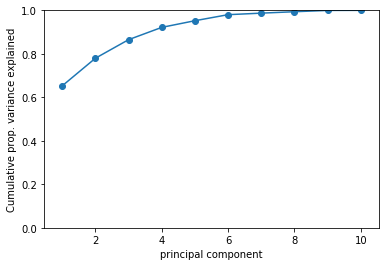

In [57]:
plt.plot(X1, cv)
plt.scatter(X1, cv)
plt.xlabel('principal component')
plt.ylabel('Cumulative prop. variance explained')
plt.ylim(0,1, 0,2)
plt.show()

In [58]:
pca = PCA(n_components=5)
X1 = pca.fit_transform(y)
components = pca.components_
print(components)

[[  1.26044145e-03  -1.60549503e-02  -9.99028539e-01  -8.19073836e-04
   -2.29725638e-02   3.19489533e-02  -9.44941982e-03  -1.66637846e-03
   -3.46123917e-03  -5.42528187e-03]
 [ -4.02436960e-04   1.87262569e-02  -1.06544788e-02   1.62353356e-02
    6.00730376e-02  -8.61697047e-02   2.93038880e-01   1.89867390e-01
    9.30541852e-01  -2.02119780e-02]
 [  1.33599242e-03   8.52850393e-02  -3.52726129e-02   1.76542133e-02
    6.81061102e-02  -9.64903750e-01   1.64555214e-01   2.02526588e-02
   -1.50541538e-01   7.30740418e-02]
 [  1.20724177e-03  -3.04487715e-02  -2.75703892e-03   1.97305607e-02
    1.05882859e-01   2.07177921e-01   8.81357572e-01   2.54574045e-01
   -3.17855476e-01  -4.36970222e-02]
 [  2.66010691e-03   1.47911919e-01  -1.17335225e-02   3.59718994e-02
    5.34287471e-01   2.72962340e-02  -3.19254560e-01   7.61785203e-01
   -9.06765199e-02  -3.57054572e-03]]


Through PCA we could see that every principal component have some variable (survey questions) that explained much of the data variance. In the first one we could see that country is a fairly relevant subject one explaining data, in the second one we found that expirience and the indurtry in which they work have a big correlation to data variance, in the others we also found that age, role in the workplace, and their major are fairly relevant in explaining this variance. This let us to believe that this 6 variables could help us predict things like if their employer had them use any sort of ML algorithms in their work.

Now having the relevant components we can start to predict if employers make the population use ML algorithms or if it is just a growing area among them. It would be very interesting to see what happens in latin american countries, never the less it could be useful to see what the case in the entire world before doing so.

thus, we have

In [90]:
w=np.zeros((np.shape(data2)[0],6))

w[:,0] = t[:,3] #age
w[:,1] = t[:,4] #country 
w[:,2] = t[:,6] #major
w[:,3] = t[:,7] #role
w[:,4] = t[:,9] #industry
w[:,5] = t[:,11] #experience

y = t[:,13] #employer ML


In [91]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [92]:
X_train, X_test,  y_train, y_test = train_test_split(w, y, test_size=0.3)
classifier = LinearSVC()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict)

score = classifier.score(X_test, y_predict)

print(cm, y_test, y_predict)


[[   0  708   79   88    0    1    0]
 [   0 1157   89  128    2    4    0]
 [   0  432  522   34    0    0    0]
 [   0 1132   84  170    0    1    0]
 [   0  711   43   72    0    1    0]
 [   0  939   60  112    0    1    0]
 [   0  479   38   68    0    3    0]] [ 0.  3.  3. ...,  1.  1.  3.] [ 1.  1.  1. ...,  1.  1.  3.]


Having done some ML algorithms over the chosen data set we can see that this model does fairly bad when it comes to predicting if a user is prone to use ML algorithms at work. Due to the size of the dataset it has been difficult to choose the appropiate data to give insight about why the scientists are inclined to use ML. It could be due to work related assignments or just for personal use. 
